# An Analysis of

### Authored by: Gavin Crisologo, Josue Melendez, Caleb Solomon, & Matthew Yu



## Table of Contents
### Introduction
### [Part 1: Data Collection](#Part-1--Data-Collection)
### [Part 2: Data Cleaning](#Part-2--Data-Cleaning)
### [Part 3- Exploratory Data Analysis](#Part-3--Exploratory-Data-Analysis)
### [Part 4- Model Implementation](#Part-4--Model-Implementation)
### [Part 5- Visualizations](#Part-5--Visualizations)
### [Part 6- Conclusions](#Part-6--Conclusions)

## Introduction

The purpose of this analysis and project is to walk a prospective data scientist through the data science pipeline via a worked example.  
For this project, we will use Gapminder's information on GDP per capita for various countries around the world, and train a model to extrapolate future GDP per capita based on the following factors:
Previous GDP per capita
CO2 Emissions per capita
Daily income


## Part 1- Data Collection

GDP per capita dataset from: https://www.gapminder.org/data/  (gdp_pcap.csv)
1) Select an indicator
2) Economy
3) Incomes & growth
4) GDP per capita

Additional information about the dataset can be found at:  
http://gapm.io/dgdpcap_cppp

CO2 Emissions per capita dataset from: https://www.gapminder.org/data/  (co2_pcap_cons.csv)
1) Select an indicator
2) CO2 Emissions per capita

Additional information about the dataset can be found at:  
http://gapm.io/dco2_consumption_historic

Daily income dataset from: https://www.gapminder.org/data/  (mincpcap_cppp.csv)
1) Select an indicator
2) Daily income

Additional information about the dataset can be found at:  
http://gapm.io/dmincpcap_cppp

## Part 2- Data Cleaning

In [169]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
# Load data from CSVs to pandas DataFrames
co2_percap = pd.read_csv('co2_pcap_cons.csv')
gdp_percap = pd.read_csv('gdp_pcap.csv')
inc_day = pd.read_csv('mincpcap_cppp.csv')

In [171]:
# Display GDP per capita dataset
print("\nGDP Per Capita Data:")
print(gdp_percap.head())


GDP Per Capita Data:
       country  1800  1801  1802  1803  1804  1805  1806  1807  1808  ...  \
0  Afghanistan   599   599   599   599   599   599   599   599   599  ...   
1       Angola   465   466   469   471   472   475   477   479   481  ...   
2      Albania   585   587   588   590   592   593   595   597   598  ...   
3      Andorra  1710  1710  1710  1720  1720  1720  1730  1730  1730  ...   
4          UAE  1420  1430  1430  1440  1450  1450  1460  1460  1470  ...   

    2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0   4800   4910   5030   5150   5270   5390   5520   5650   5780   5920  
1  24.8k  25.3k  25.9k  26.4k  26.9k  27.4k    28k  28.5k  29.1k  29.6k  
2    54k  54.6k  55.2k  55.8k  56.4k  56.9k  57.5k  58.1k  58.7k  59.2k  
3  79.3k  79.5k  79.8k  80.1k  80.4k  80.7k    81k  81.2k  81.5k  81.8k  
4  92.5k  92.6k  92.6k  92.7k  92.8k  92.9k  92.9k    93k  93.1k  93.1k  

[5 rows x 302 columns]


In [172]:
# Display CO2 per capita dataset
print("CO2 Per Capita Consumption Data:")
print(co2_percap.head())

CO2 Per Capita Consumption Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...  2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...  0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...  1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...  2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.9   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...    27  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700   


In [173]:
# Display Daily income dataset
print("\nIncome Per Capita Data:")
print(inc_day.head())


Income Per Capita Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  1.330  1.330  1.330  1.330  1.330  1.330  1.330  1.330  1.330   
1       Angola  0.779  0.781  0.785  0.789  0.791  0.795  0.799  0.802  0.806   
2      Albania  0.919  0.921  0.924  0.927  0.929  0.932  0.935  0.937  0.940   
3      Andorra  1.880  1.880  1.880  1.890  1.890  1.890  1.900  1.900  1.900   
4          UAE  1.650  1.660  1.670  1.670  1.680  1.680  1.690  1.700  1.700   

   ...   2091   2092   2093   2094   2095   2096   2097   2098   2099   2100  
0  ...   10.7   10.9   11.2   11.4   11.7   12.0   12.3   12.6   12.8   13.2  
1  ...   19.8   20.2   20.6   21.0   21.4   21.9   22.3   22.7   23.2   23.6  
2  ...   56.7   57.4   58.0   58.6   59.2   59.8   60.5   61.1   61.7   62.3  
3  ...   87.1   87.4   87.8   88.1   88.4   88.7   89.0   89.3   89.6   89.9  
4  ...  102.0  102.0  102.0  102.0  102.0  102.0  102.0  102.0  102.0  103.0  

[5 rows x 302

In [174]:
# Identify common countries across all three datasets
common_countries = set(co2_percap['country']) & set(gdp_percap['country']) & set(inc_day['country'])

In [175]:
# Filter DataFrames and keep only the common countries
co2_percap = co2_percap[co2_percap['country'].isin(common_countries)]
gdp_percap = gdp_percap[gdp_percap['country'].isin(common_countries)]
inc_day = inc_day[inc_day['country'].isin(common_countries)]

In [176]:
# Drop columns with years > 2024 (to avoid predictions not our own)
columns_to_keep_co2 = ['country'] + [col for col in co2_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_gdp = ['country'] + [col for col in gdp_percap.columns[1:] if col.isdigit() and int(col) <= 2024]
columns_to_keep_inc = ['country'] + [col for col in inc_day.columns[1:] if col.isdigit() and int(col) <= 2024]

co2_percap = co2_percap[columns_to_keep_co2]
gdp_percap = gdp_percap[columns_to_keep_gdp]
inc_day = inc_day[columns_to_keep_inc]

In [177]:
# Convert numerics to floats and coerce errors to homogenize dataset
def num_to_float(df):
    for col in df.columns[1:]:
        df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', '').str.replace('−', '-'), errors='coerce')
    return df

co2_percap = num_to_float(co2_percap)
gdp_percap = num_to_float(gdp_percap)
inc_day = num_to_float(inc_day)

In [178]:
# Check for null values in each dataframe
print("\nNull values in CO2 Per Capita Data:")
print(co2_percap.isnull().sum().sum())
print("\nNull values in GDP Per Capita Data:")
print(gdp_percap.isnull().sum().sum())
print("\nNull values in Daily Income Data:")
print(inc_day.isnull().sum().sum())


Null values in CO2 Per Capita Data:
0

Null values in GDP Per Capita Data:
5989

Null values in Daily Income Data:
0


In [179]:
# Display the first few rows of each filtered dataframe
print("\nFiltered CO2 Per Capita Data:")
print(co2_percap.head())
print("\nFiltered GDP Per Capita Data:")
print(gdp_percap.head())
print("\nFiltered Daily Income Data:")
print(inc_day.head())


Filtered CO2 Per Capita Data:
       country   1800   1801   1802   1803   1804   1805   1806   1807   1808  \
0  Afghanistan  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
1       Angola  0.009  0.009  0.009  0.009  0.009  0.009  0.010  0.010  0.010   
2      Albania  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001   
3      Andorra  0.333  0.335  0.337  0.340  0.342  0.345  0.347  0.350  0.352   
4          UAE  0.063  0.063  0.064  0.064  0.064  0.064  0.065  0.065  0.065   

   ...   2013    2014    2015    2016    2017    2018    2019    2020    2021  \
0  ...   0.28   0.253   0.262   0.245   0.247   0.254   0.261   0.261   0.279   
1  ...   1.28   1.640   1.220   1.180   1.150   1.120   1.150   1.120   1.200   
2  ...   2.27   2.250   2.040   2.010   2.130   2.080   2.050   2.000   2.120   
3  ...   5.90   5.830   5.970   6.070   6.270   6.120   6.060   5.630   5.970   
4  ...  27.00  26.800  27.000  26.700  23.900  23.500  21.200  19.700  20.700

## Part 3- Exploratory Data Analysis

First, we'd like to get a general view of what our dataset looks like visually, and get some preliminary ideas of common trends in order to make hypotheses about our model. We do this by first examining each dataset in its entirety, and then honing in on specific years and criteria relevant to our discussion.

/tmp/ipykernel_8866/1199896416.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


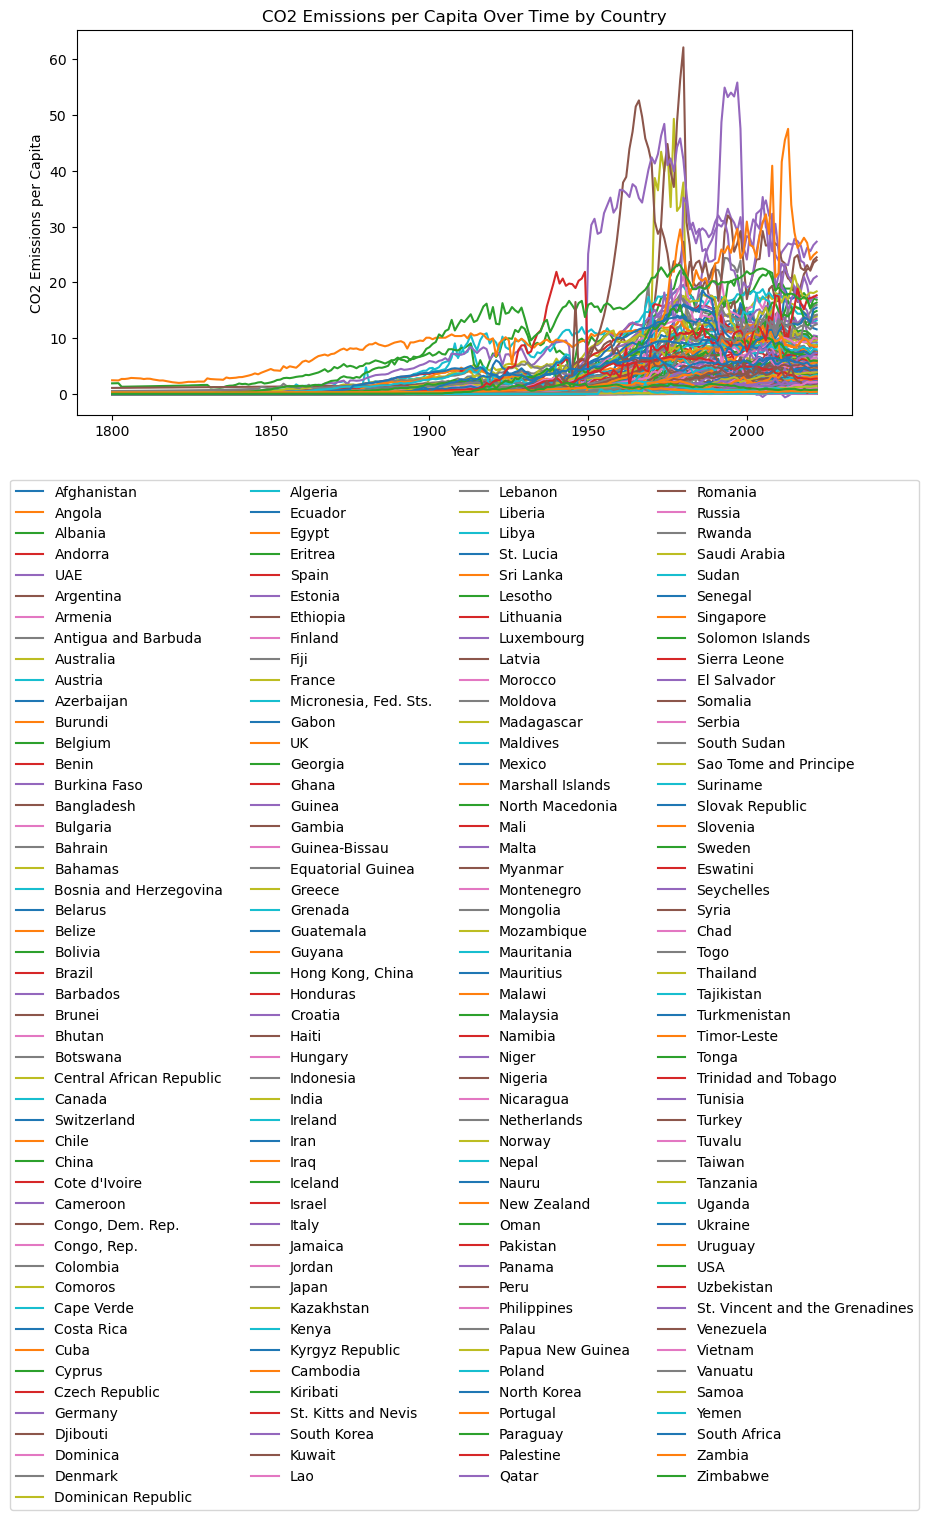

/tmp/ipykernel_8866/1199896416.py:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


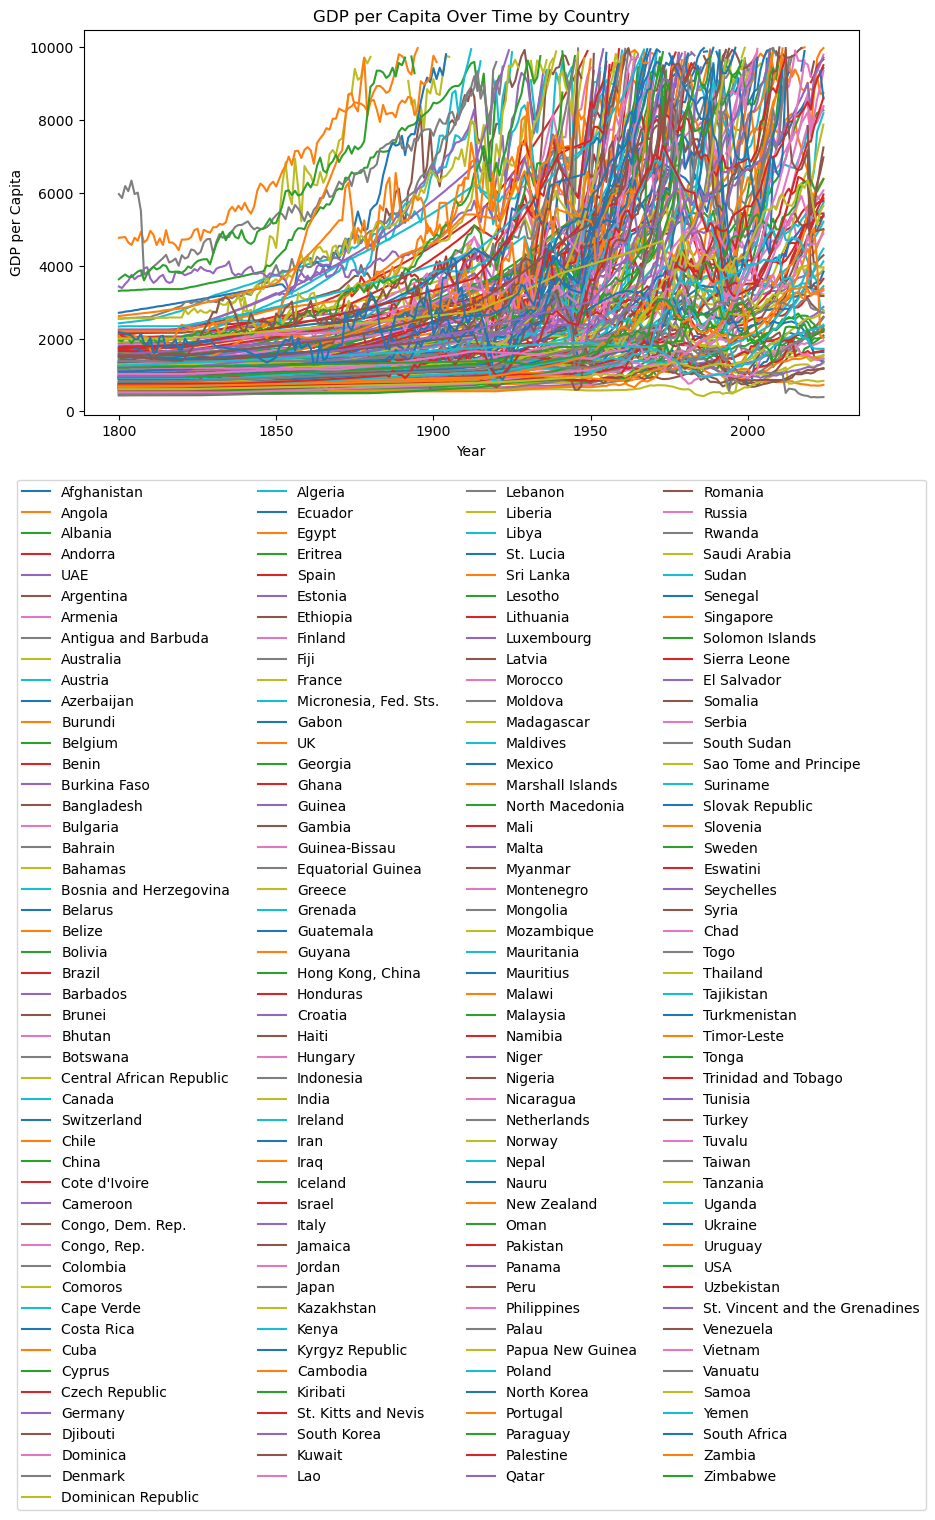

/tmp/ipykernel_8866/1199896416.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


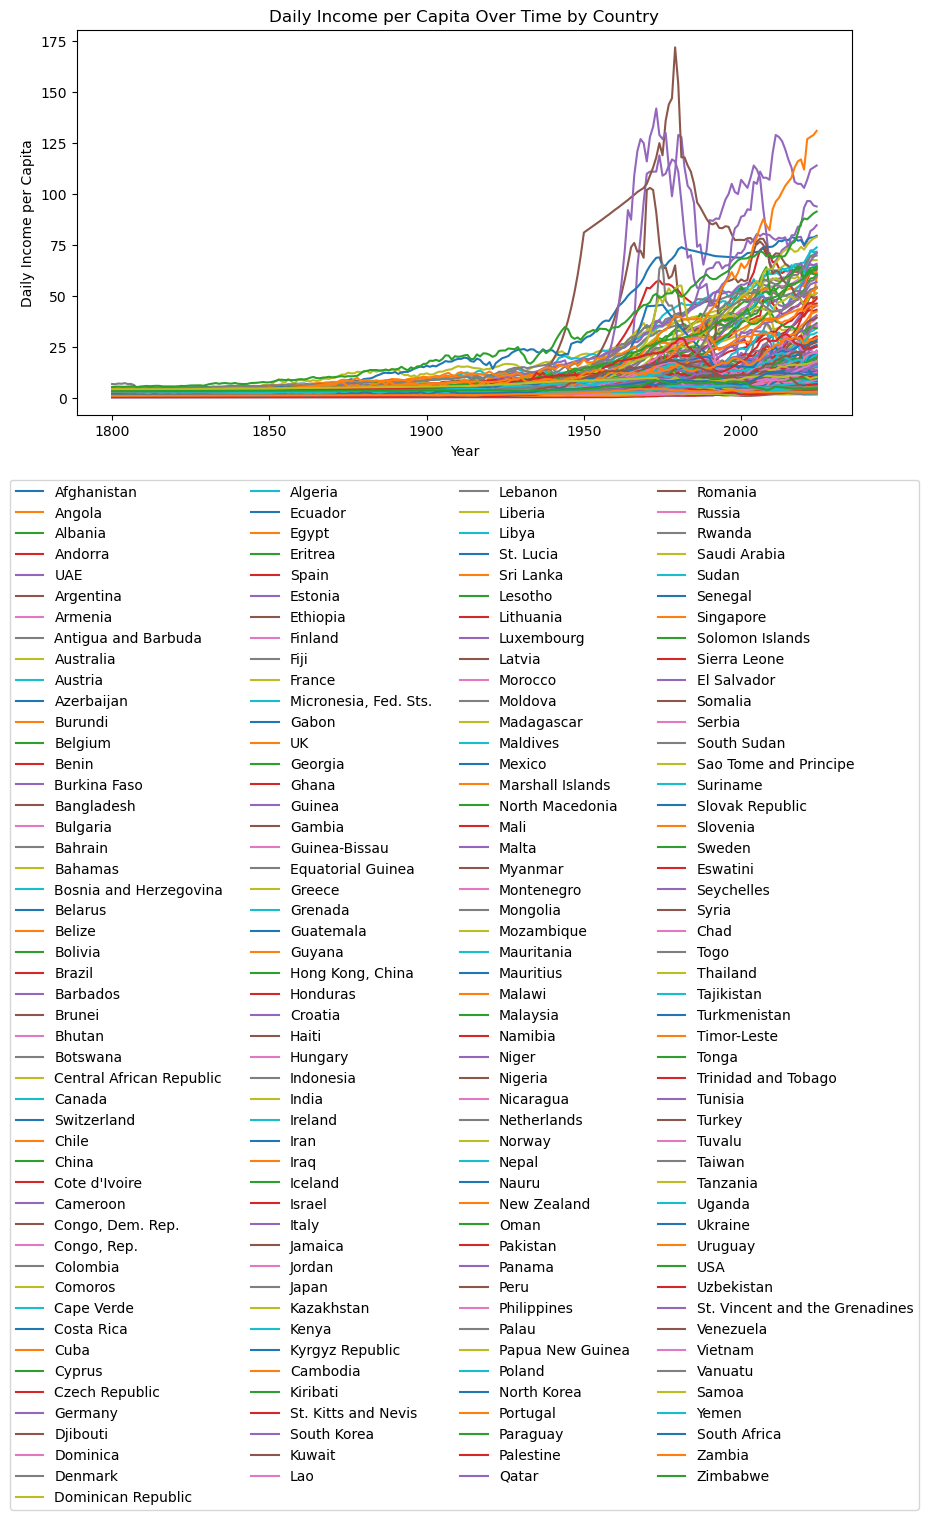

In [180]:
# Plot CO2 per capita over time for each country
plt.figure(figsize=(10, 5))
for country in co2_percap['country']:
    years = co2_percap.columns[1:].astype(int)
    emissions = co2_percap[co2_percap['country'] == country].values[0][1:].astype(float)
    plt.plot(years, emissions, label=country)
plt.xlabel('Year')
plt.ylabel('CO2 Emissions per Capita')
plt.title('CO2 Emissions per Capita Over Time by Country')
# Tighten the legend so the plot isn't so big
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()

# Plot GDP per capita over time for each country
plt.figure(figsize=(10, 5))
for country in gdp_percap['country']:
    years = gdp_percap.columns[1:].astype(int)
    gdp = gdp_percap[gdp_percap['country'] == country].values[0][1:].astype(float)
    plt.plot(years, gdp, label=country)
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('GDP per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4) 
plt.tight_layout()
plt.show()

# Plot Daily Income per capita over time for each country
plt.figure(figsize=(10, 5))
for country in inc_day['country']:
    years = inc_day.columns[1:].astype(int)
    income = inc_day[inc_day['country'] == country].values[0][1:].astype(float)
    plt.plot(years, income, label=country)
plt.xlabel('Year')
plt.ylabel('Daily Income per Capita')
plt.title('Daily Income per Capita Over Time by Country')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.tight_layout()
plt.show()


Clearly, these graphs are massive and cluttered; while there is an apparent general upward trend in all cases (as we would expect), the GDP per capita graph especially is incredibly difficult to read, and indeed very little useful information can be garnered from it. Consequently we would like to analyze smaller samples of the data to perhaps gain a greater understanding of interesting sub-trends that a model could perhaps generalize. We take the following four potentially interesting cases based on a knowledge of history and a cursory glance at the above. For each of these, we provide a set of three graphs, one for each dataset, to visualize each of our three metrics.

1) High Emissions Countries

Such countries would be those with the broadest industrialization infrastructure that we expect to have massive carbon emissions. For these, we include the USA, China, Russia, India, and Japan.

2) Various European Countries

This allows us to get a gauge of potential trends on one subregion of the world.

3) "Developed" Countries

A set of countries considered to be "developed," first-world nations. We should expect these to have matured industrial economies.

4) "Developing" Countries

Opposite case 3, this might give us a gauge of potential trends (or potential volatility!) of nations whose industrial economies and transition we might not expect to have completely stabilized.

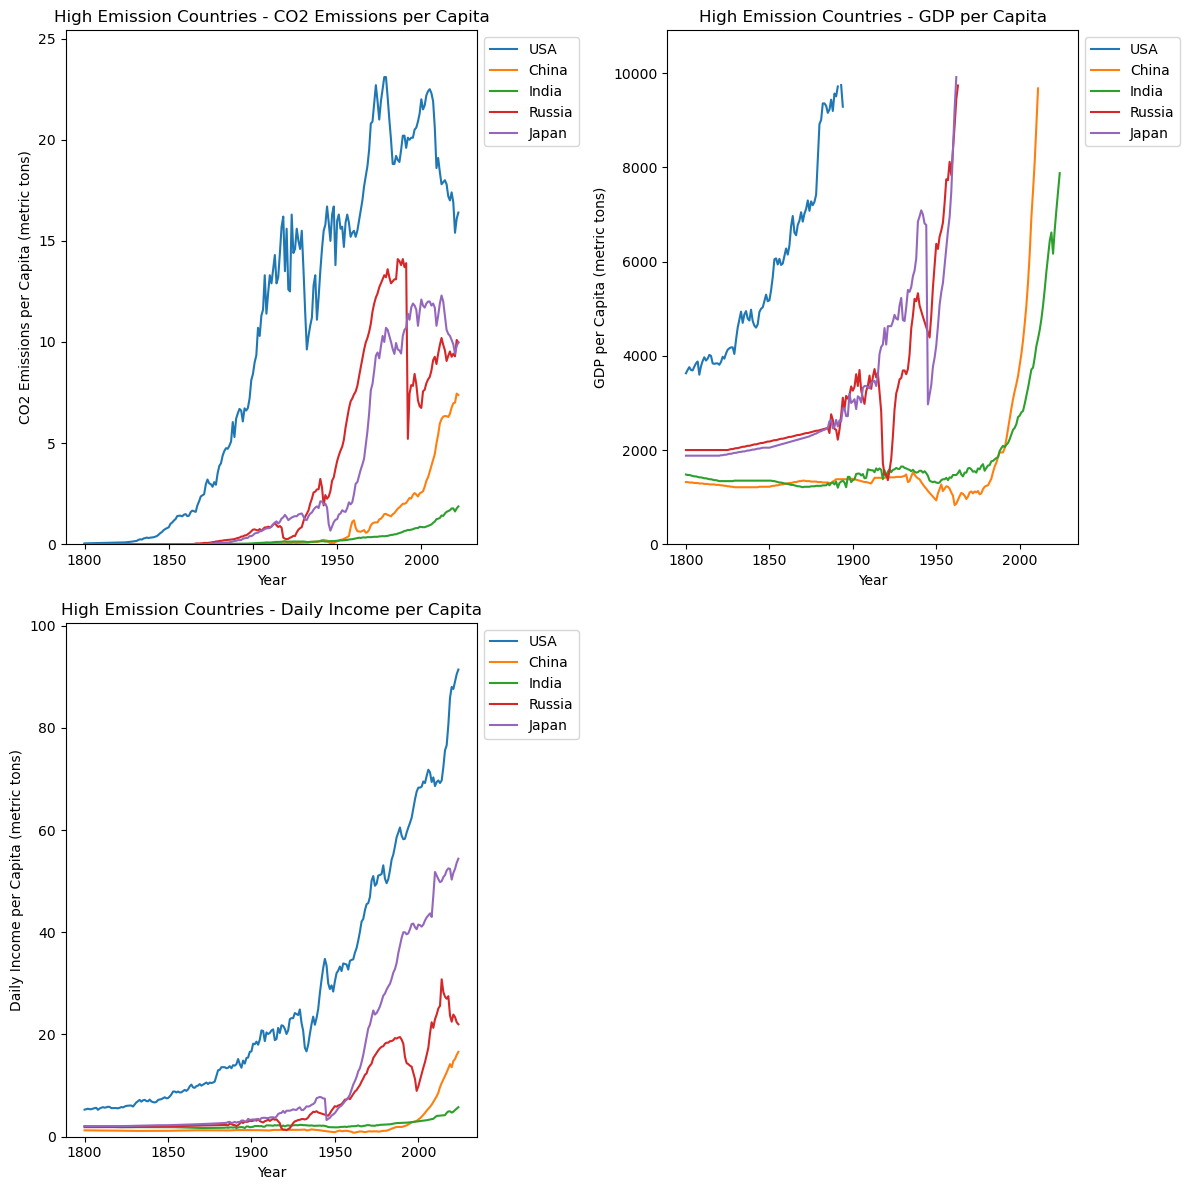

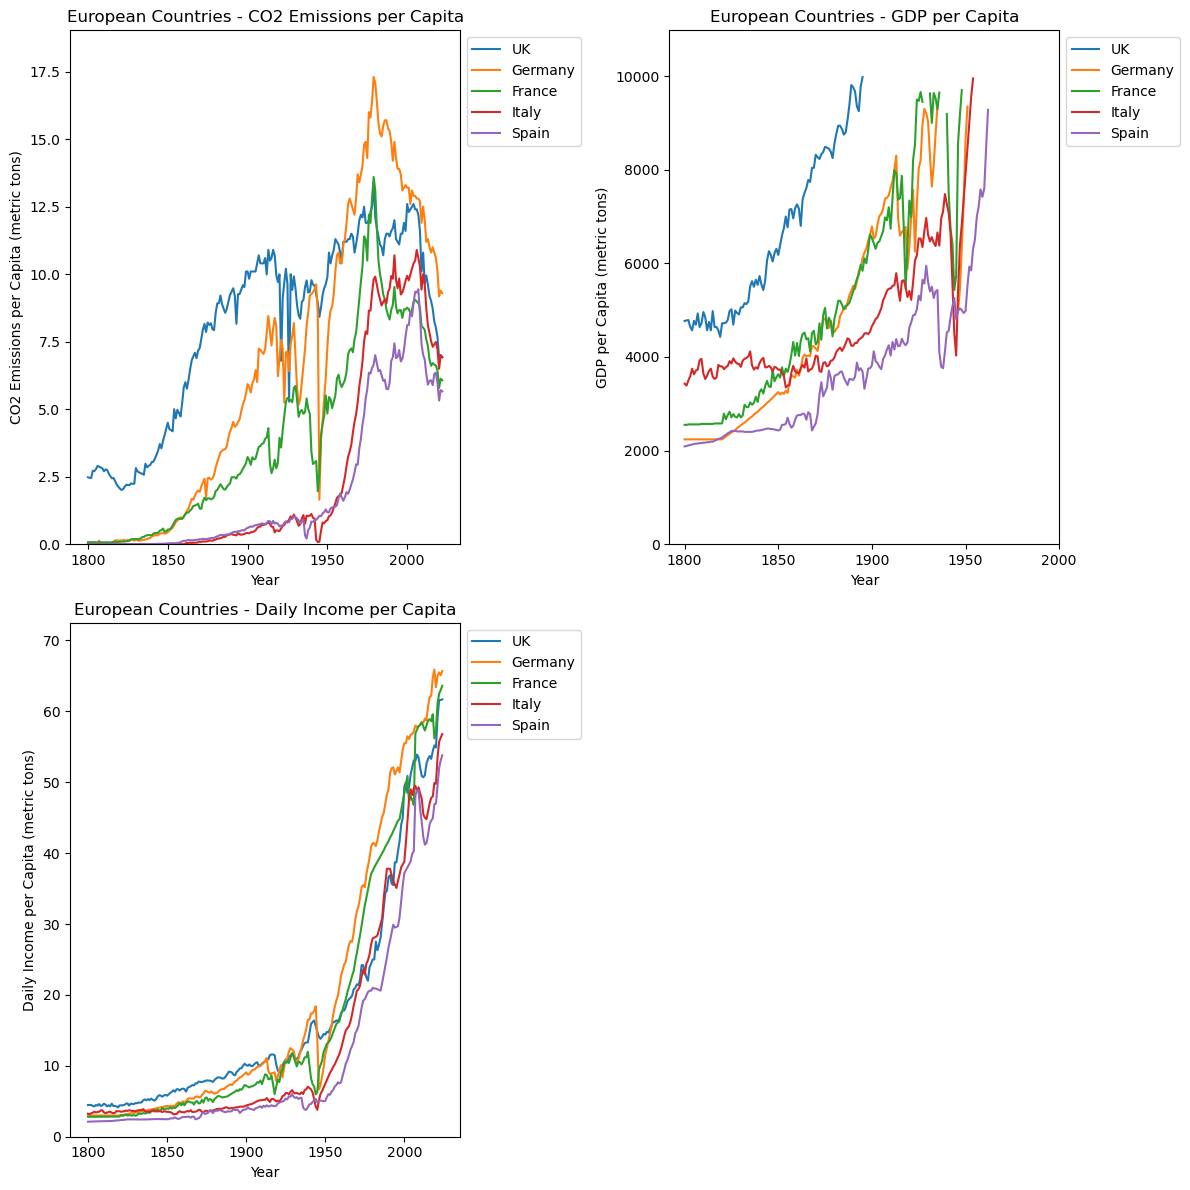

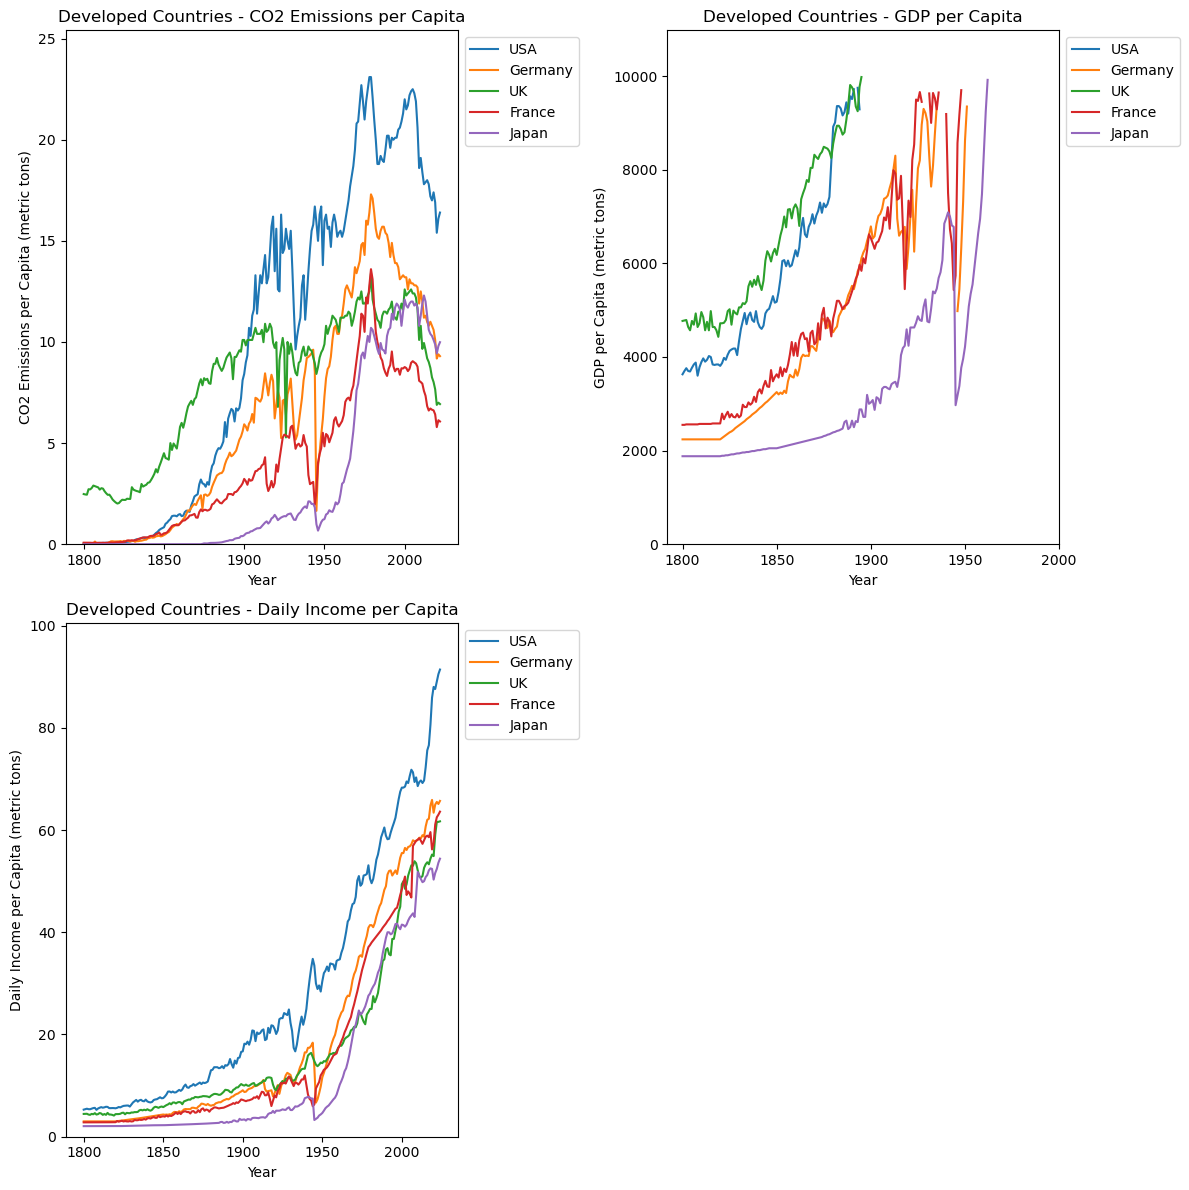

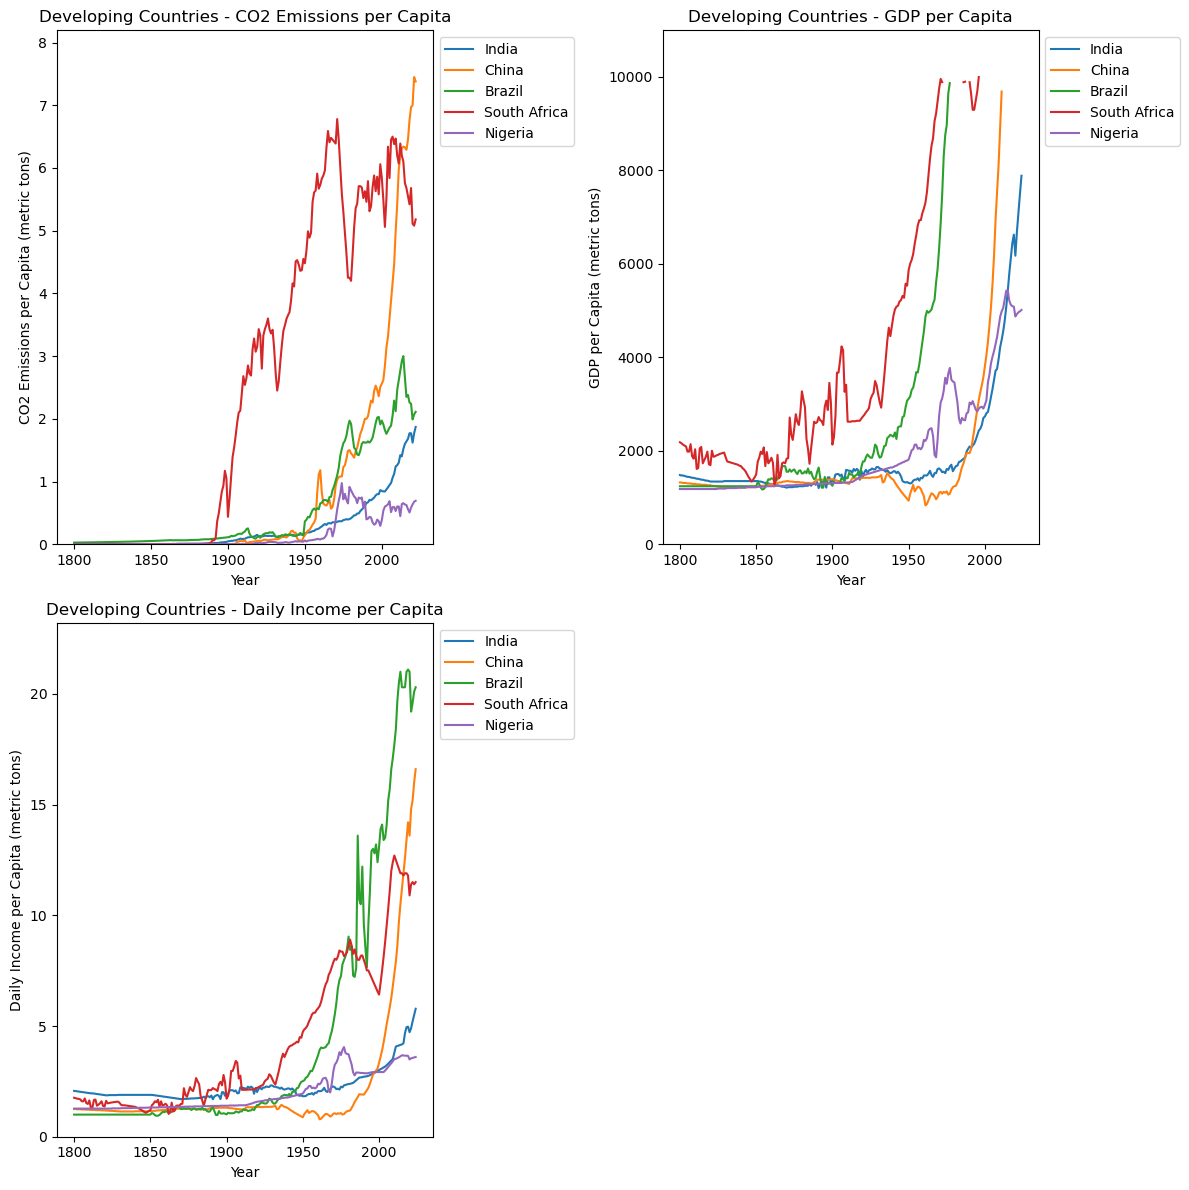

In [181]:
limiting_criteria_sets = [
    ('High Emission Countries', ['USA', 'China', 'India', 'Russia', 'Japan']),
    ('European Countries', ['UK', 'Germany', 'France', 'Italy', 'Spain']),
    ('Developed Countries', ['USA', 'Germany', 'UK', 'France', 'Japan']),
    ('Developing Countries', ['India', 'China', 'Brazil', 'South Africa', 'Nigeria'])
]

# Function to plot CO2 Emissions per Capita, GDP per Capita, and Income per Day data for a given set of countries
def plot_data(countries, title_prefix, datasets, set_names):
    # Generate a figure
    fig = plt.figure(figsize=(12, 12))
    
    # Loop through datasets
    for i in range(len(datasets)):
        # Grab years and generate a subplot grid
        years = datasets[i].columns[1:].astype(int)
        ax = plt.subplot2grid((2, 2), (i // 2, i % 2))
        
        # Keep the max for margin cutoffs
        m = 0
        for country in countries:
            # Iterate through countries in the limiting sets, grabbing and adding their data
            data = datasets[i][datasets[i]['country'] == country].values[0][1:].astype(float)
            ax.plot(years, data, label=country)
            m = max(m, max(data))

        # Labeling and cleaning
        ax.set_ylabel(f'{set_names[i]} per Capita (metric tons)')
        ax.set_xlabel('Year')
        ax.set_xticks(years[::50]) # 50 year increments for cleanliness

        ax.set_title(f'{title_prefix} - {set_names[i]} per Capita')
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        ax.set_ylim(0, m * 1.1)  # Ensure y-axis includes all data

    plt.tight_layout()
    plt.show()

# Loop over each set of limiting criteria and generate CO2 Emissions per Capita, GDP per Capita, and Income per Day (per capita) plots
for title_prefix, countries in limiting_criteria_sets:
    plot_data(countries, title_prefix, [co2_percap, gdp_percap, inc_day], ['CO2 Emissions', 'GDP', 'Daily Income'])


In [182]:
# This is just something I used to grab the encodings of countries, for example 'United States' is actually 'USA' in these datasets
print(co2_percap['country'].unique())

['Afghanistan' 'Angola' 'Albania' 'Andorra' 'UAE' 'Argentina' 'Armenia'
 'Antigua and Barbuda' 'Australia' 'Austria' 'Azerbaijan' 'Burundi'
 'Belgium' 'Benin' 'Burkina Faso' 'Bangladesh' 'Bulgaria' 'Bahrain'
 'Bahamas' 'Bosnia and Herzegovina' 'Belarus' 'Belize' 'Bolivia' 'Brazil'
 'Barbados' 'Brunei' 'Bhutan' 'Botswana' 'Central African Republic'
 'Canada' 'Switzerland' 'Chile' 'China' "Cote d'Ivoire" 'Cameroon'
 'Congo, Dem. Rep.' 'Congo, Rep.' 'Colombia' 'Comoros' 'Cape Verde'
 'Costa Rica' 'Cuba' 'Cyprus' 'Czech Republic' 'Germany' 'Djibouti'
 'Dominica' 'Denmark' 'Dominican Republic' 'Algeria' 'Ecuador' 'Egypt'
 'Eritrea' 'Spain' 'Estonia' 'Ethiopia' 'Finland' 'Fiji' 'France'
 'Micronesia, Fed. Sts.' 'Gabon' 'UK' 'Georgia' 'Ghana' 'Guinea' 'Gambia'
 'Guinea-Bissau' 'Equatorial Guinea' 'Greece' 'Grenada' 'Guatemala'
 'Guyana' 'Hong Kong, China' 'Honduras' 'Croatia' 'Haiti' 'Hungary'
 'Indonesia' 'India' 'Ireland' 'Iran' 'Iraq' 'Iceland' 'Israel' 'Italy'
 'Jamaica' 'Jordan' 'Japan' 

## Part 4- Model Implementation

Model Preparation

In [183]:
# Relevant import statements
import numpy as np
import tensorflow as tf 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [184]:
# Melt dataframes to get a Year column
gdp_percap_melted = gdp_percap.melt(id_vars='country', var_name='year', value_name='gdp')
co2_percap_melted = co2_percap.melt(id_vars='country', var_name='year', value_name='co2')
inc_day_melted = inc_day.melt(id_vars='country', var_name='year', value_name='income')

# Ensure Years are integers
gdp_percap_melted['year'] = gdp_percap_melted['year'].astype(int)
co2_percap_melted['year'] = co2_percap_melted['year'].astype(int)
inc_day_melted['year'] = inc_day_melted['year'].astype(int)

# Filter out data from before 1950
gdp_percap_melted = gdp_percap_melted[gdp_percap_melted['year'] >= 1950]
co2_percap_melted = co2_percap_melted[co2_percap_melted['year'] >= 1950]
inc_day_melted = inc_day_melted[inc_day_melted['year'] >= 1950]

# Show each melted dataframe
print(gdp_percap_melted.head())
print(co2_percap_melted.head())
print(inc_day_melted.head())

           country  year     gdp
28950  Afghanistan  1950  1660.0
28951       Angola  1950  2700.0
28952      Albania  1950  2390.0
28953      Andorra  1950     NaN
28954          UAE  1950  2060.0
           country  year    co2
28950  Afghanistan  1950  0.011
28951       Angola  1950  0.041
28952      Albania  1950  0.235
28953      Andorra  1950  2.700
28954          UAE  1950  0.354
           country  year  income
28950  Afghanistan  1950    3.68
28951       Angola  1950    4.52
28952      Albania  1950    3.75
28953      Andorra  1950   11.10
28954          UAE  1950    2.39


In [185]:
# Helper Functions for the model

# Extract the features and labels from a dataframe
def extract_features_labels(df, features, label):
    # Extract features and labels
    X, y = df[features].values, df[label].values

    # Add a bias term for the intercept
    X = np.column_stack((np.ones(len(X)), X))
    return X, y


Univariate Model

In [186]:
# Merge all datasets on country and year
uni_data = pd.merge(gdp_percap_melted, co2_percap_melted, on=['country', 'year'])

# Drop rows with NaN values
uni_data = uni_data.dropna()

print(f'uni_data shape: {uni_data.shape}')
uni_data.head()

uni_data shape: (8771, 4)


,country,year,gdp,co2
0,Afghanistan,1950,1660.0,0.011
1,Angola,1950,2700.0,0.041
2,Albania,1950,2390.0,0.235
4,UAE,1950,2060.0,0.354
6,Armenia,1950,4900.0,0.875


In [195]:
# Univariate neural network
# Get X and y
X_uni = uni_data['co2'].values
y_uni = uni_data['gdp'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_uni, y_uni, test_size=0.2, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, 1))
X_test = scaler.transform(X_test.reshape(-1, 1))

# Create a neural network
model = tf.keras.models.Sequential()

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Neural Network Model MSE: {loss}')

Epoch 1/100


/home/gcris/miniconda3/envs/cmsc320_final_tutorial/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22203184.0000 - val_loss: 8426373.0000
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5721392.5000 - val_loss: 4918585.5000
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4699271.5000 - val_loss: 4597489.5000
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4345790.0000 - val_loss: 4384775.5000
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 993us/step - loss: 4313376.5000 - val_loss: 4279608.0000
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4217341.0000 - val_loss: 4288121.0000
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4185198.7500 - val_loss: 4223345.5000
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4199921.5000 - val_loss: 4220098.5000
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4208424.5000 - val_loss: 4248273.5000
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4170115.2500 - val_loss: 4219271.5000
Epoch 11/100
176/1

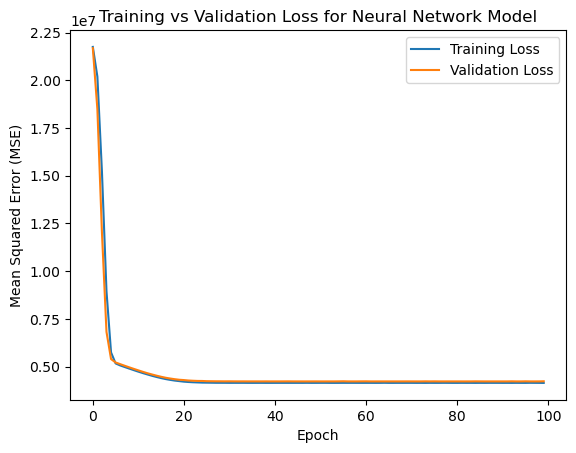

In [194]:
# Plot training vs testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation Loss for Neural Network Model')
plt.legend()
plt.show()

Multivariate Model

In [191]:
# Merge all datasets on country and year
multi_data = pd.merge(uni_data, inc_day_melted, on=['country', 'year'])

# Drop rows with NaN values
multi_data = multi_data.dropna()

print(f'multi_data shape: {multi_data.shape}')
multi_data.head()

multi_data shape: (8771, 5)


,country,year,gdp,co2,income
0,Afghanistan,1950,1660.0,0.011,3.68
1,Angola,1950,2700.0,0.041,4.52
2,Albania,1950,2390.0,0.235,3.75
3,UAE,1950,2060.0,0.354,2.39
4,Armenia,1950,4900.0,0.875,9.11


In [196]:
# Multivariate neural network
# Get X and y
X_multi = multi_data[['co2', 'income']].values
y_multi = multi_data['gdp'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a neural network
model = tf.keras.models.Sequential()

# Hidden layers
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Output layer
model.add(tf.keras.layers.Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Neural Network Model MSE: {loss}')

Epoch 1/100


/home/gcris/miniconda3/envs/cmsc320_final_tutorial/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20978062.0000 - val_loss: 4460084.5000
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3925237.0000 - val_loss: 3262046.7500
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2985464.5000 - val_loss: 2588233.0000
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2305185.2500 - val_loss: 2282805.0000
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2181987.5000 - val_loss: 2213133.0000
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2047777.1250 - val_loss: 2199181.7500
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2116005.0000 - val_loss: 2197745.7500
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2105256.7500 - val_loss: 2202007.2500
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2078413.0000 - val_loss: 2196379.2500
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2074212.8750 - val_loss: 2204684.2500
Epoch 11/100
176/176

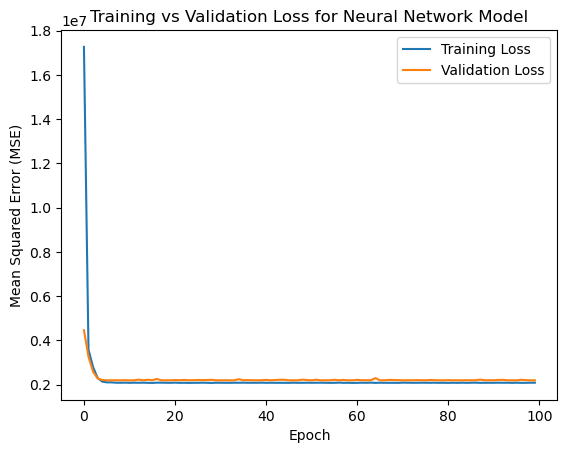

In [197]:
# Plot training vs testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training vs Validation Loss for Neural Network Model')
plt.legend()
plt.show()

## Part 5- Visualizations

## Part 6- Conclusions